# Análise exploratória

In [77]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# dados
df = pd.read_csv('../data/housing.csv', encoding='utf-8', sep=',')

## dataset

In [3]:
# head
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
# tail
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [9]:
# dimensoes
f'registros: {df.shape[0]} - atributos: {df.shape[1]}'

'registros: 489 - atributos: 4'

In [10]:
# tipo de dados
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [11]:
# infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [13]:
# check dados faltantes
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [16]:
# check registros duplicados
df.duplicated().any()

False

## atributos

In [17]:
# atributos
df.columns.values

array(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype=object)

Atributos previsores

- RM: é o número médio de cômodos entre os imóveis no bairro.

- LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

- PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

Variável alvo

- MEDV: valor médio das casas

In [20]:
# analise estatistica dos atributos
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


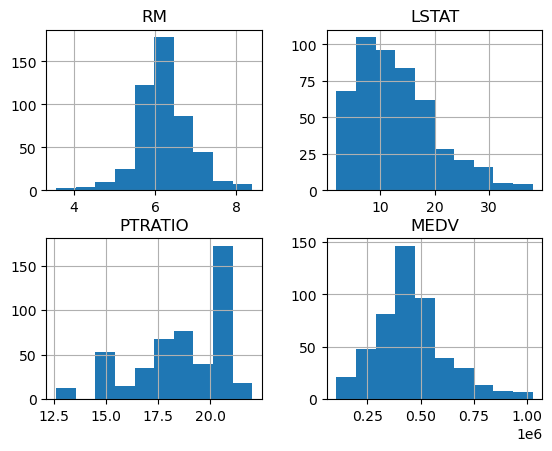

In [26]:
# histogramas
df.hist();

In [25]:
# outliers
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in df.columns:
    print("{:<15} {:>6}".format(col, len(count_outliers(df, col))))

RM                  22
LSTAT                7
PTRATIO             13
MEDV                22


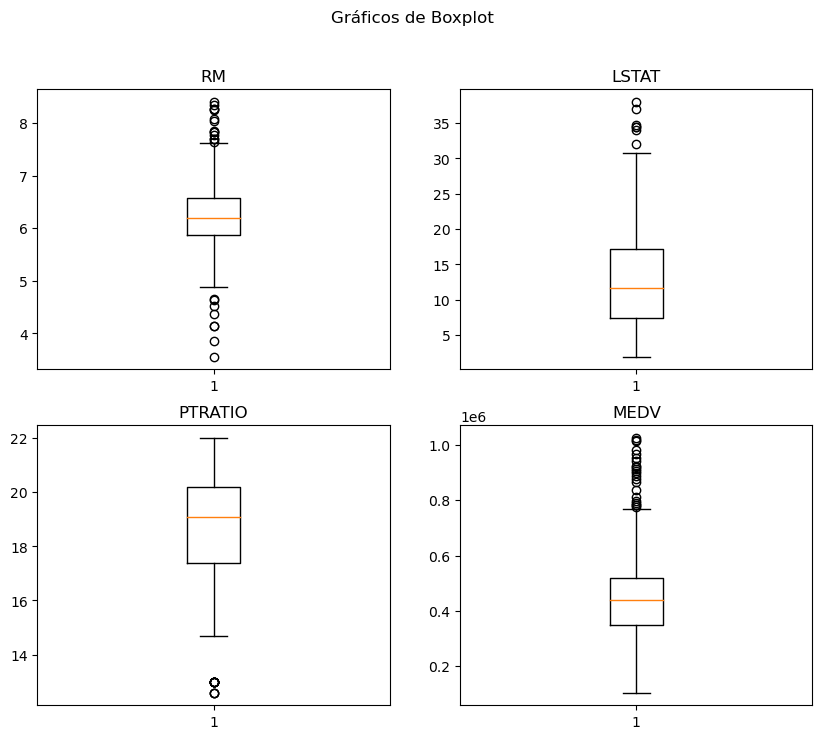

In [45]:
# check outliers
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for indice, col in enumerate(df.columns):
    row = int(indice / 2)
    col_idx = indice % 2
    axs[row, col_idx].boxplot(df[col])
    axs[row, col_idx].set_title(col)

plt.suptitle('Gráficos de Boxplot')
plt.show()

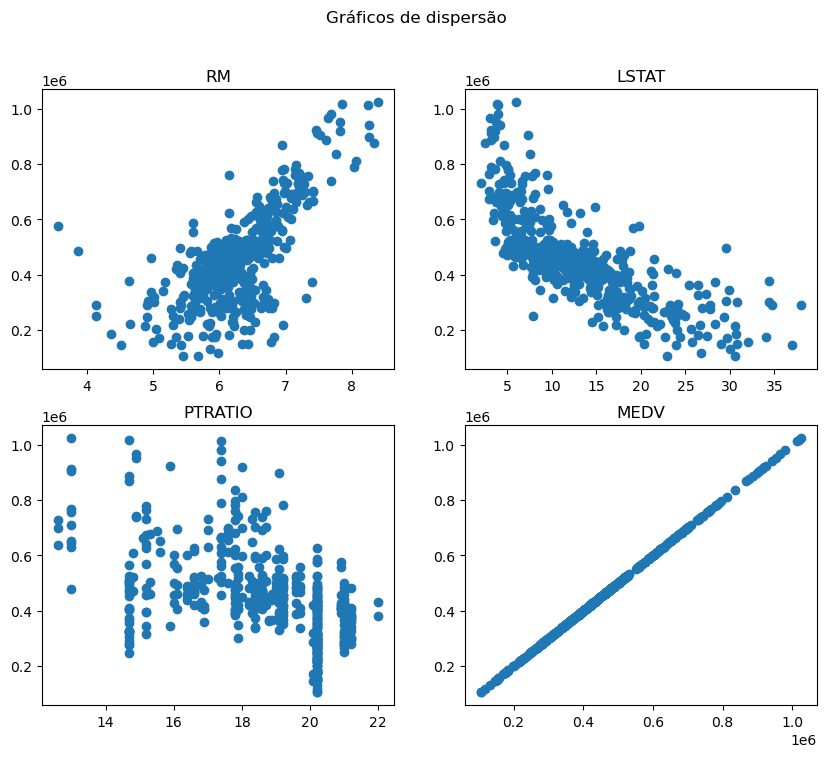

In [49]:
# check dispersão
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for indice, col in enumerate(df.columns):
        row = int(indice / 2)
        col_idx = indice % 2
        axs[row, col_idx].scatter(df[col],df.MEDV)
        axs[row, col_idx].set_title(col)

plt.suptitle('Gráficos de dispersão')
plt.show()

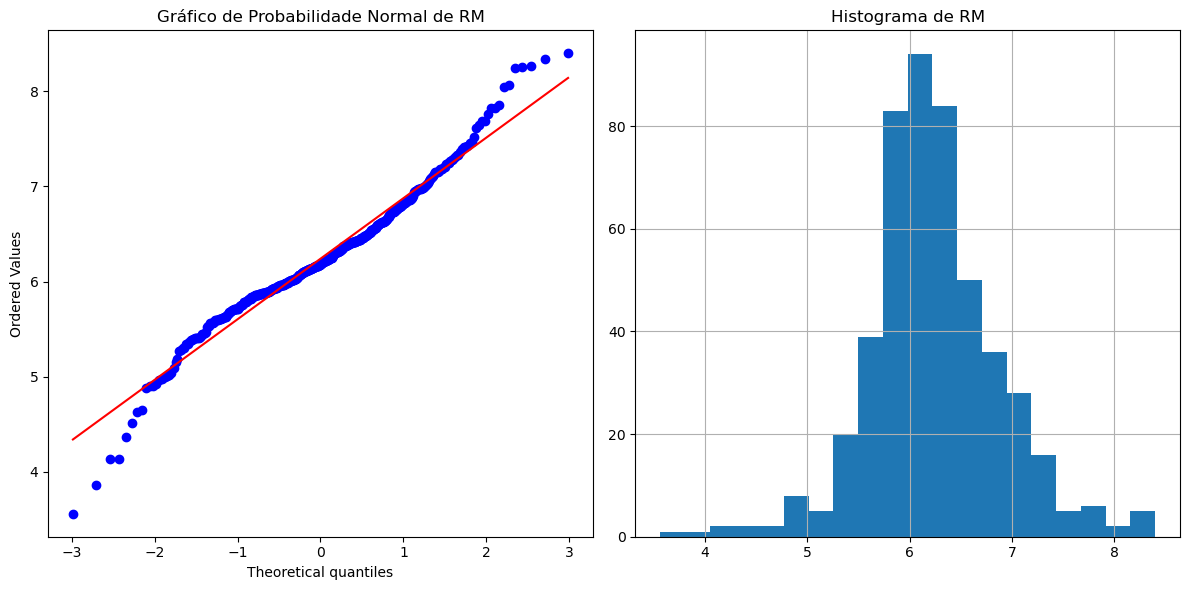

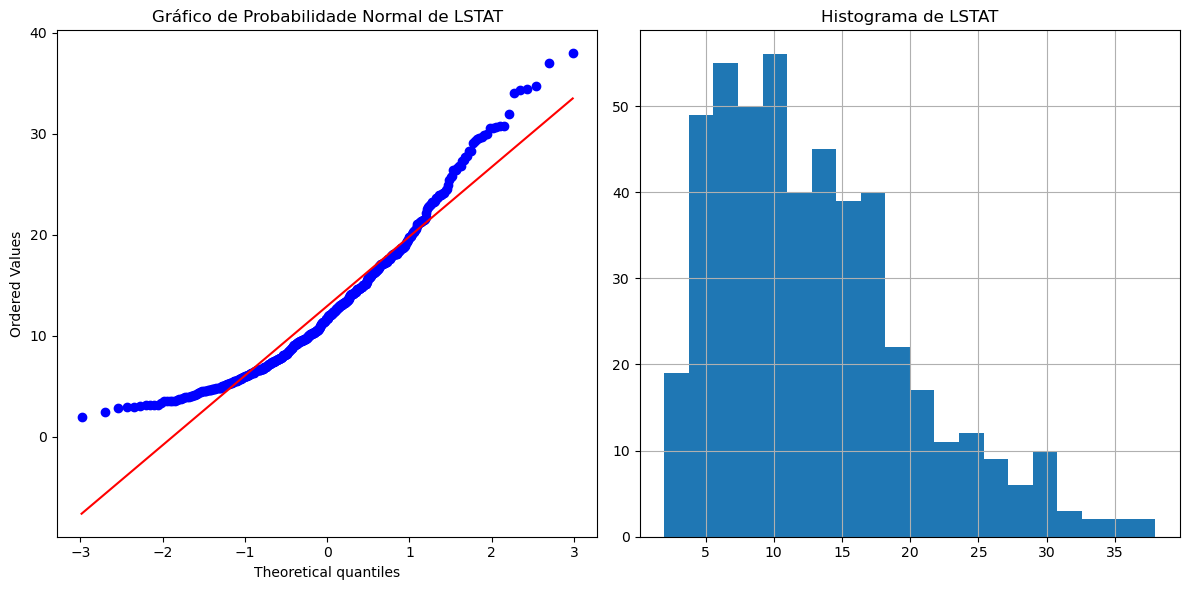

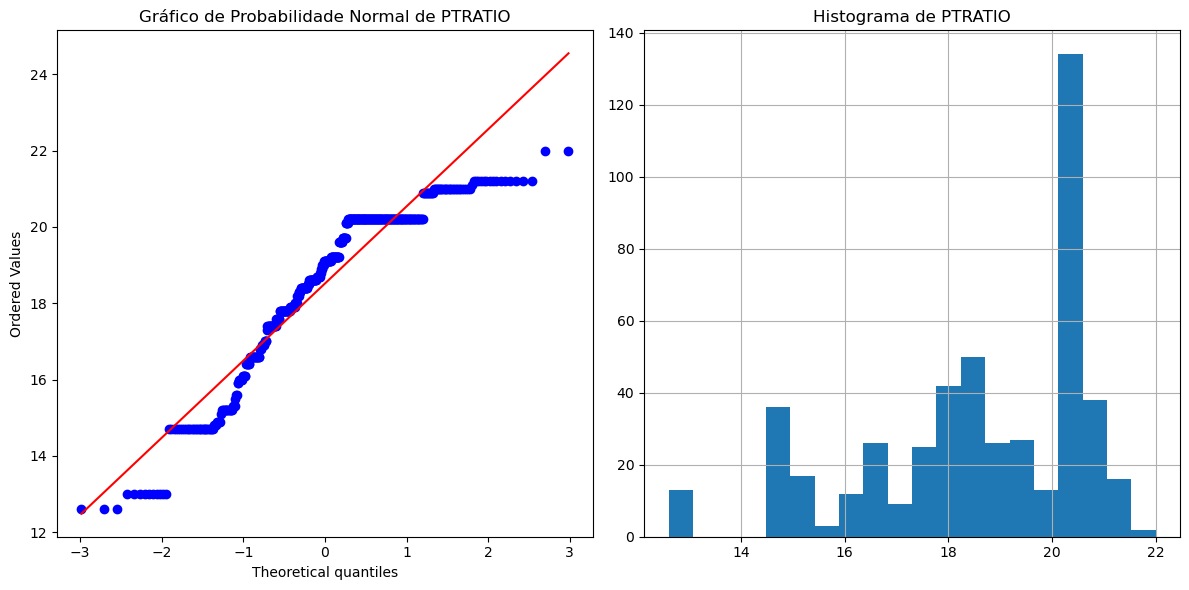

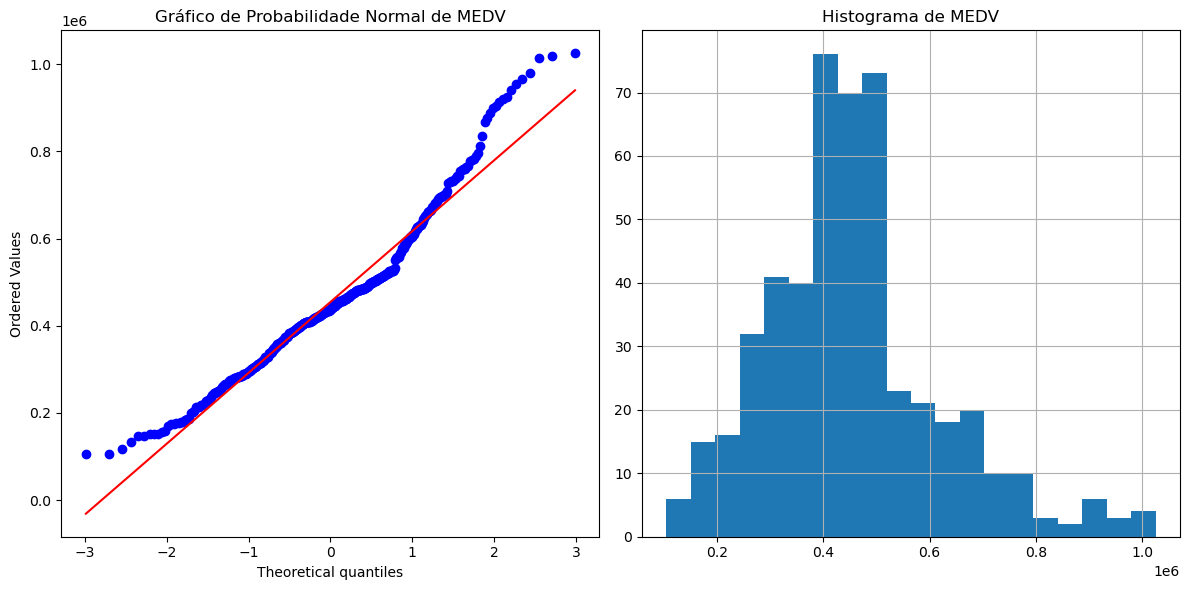

In [59]:
# check normalidade dos dados
for col in df.columns:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    stats.probplot(df[col], dist="norm", plot=axs[0])
    axs[0].set_title(f'Gráfico de Probabilidade Normal de {col}')
    
    df[col].hist(ax=axs[1], bins=20)
    axs[1].set_title(f'Histograma de {col}')

    fig.tight_layout()
    plt.show()

In [71]:
# teste shapiro para normalidade
"""
Ho = distribuição normal : p > 0.05
Ha = distribuição != normal : p <= 0.05
"""
for col in df.columns:
    estatistica, p = stats.shapiro(df[col])
    print(col)
    print(f'estatisca do teste : {estatistica}')
    print(f'p-valor = {p}')
    if p > 0.05:
        print('distribuição normal\n')
    else:
        print('distribuição não normal\n')

RM
estatisca do teste : 0.9708166718482971
p-valor = 2.7085933496096004e-08
distribuição não normal

LSTAT
estatisca do teste : 0.9371760487556458
p-valor = 1.6900520425407878e-13
distribuição não normal

PTRATIO
estatisca do teste : 0.9064800143241882
p-valor = 9.07583957756611e-17
distribuição não normal

MEDV
estatisca do teste : 0.9596619009971619
p-valor = 2.5762864064304836e-10
distribuição não normal



In [76]:
# correlações
"""
Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)


Ho = não há correlação linear: p > 0,05
Ha = existe correlação linear: p <= 0,05
"""
for col in df.columns:
    coef, p = stats.spearmanr(df.MEDV, df[col])
    print(col)
    print('Coeficiente de correlação: {}'.format(coef))
    print('p-valor: {}'.format(p))
    if p > 0.05:
        print('não há correlação linear\n')
    else:
        print('existe correlação linear\n')


RM
Coeficiente de correlação: 0.6240572939087418
p-valor: 3.845028634343325e-54
existe correlação linear

LSTAT
Coeficiente de correlação: -0.8455267494054259
p-valor: 8.25183845003003e-135
existe correlação linear

PTRATIO
Coeficiente de correlação: -0.5592761164167336
p-valor: 1.3794858687631326e-41
existe correlação linear

MEDV
Coeficiente de correlação: 0.9999999999999998
p-valor: 0.0
existe correlação linear



In [74]:
# check correlação
df.corr(method='spearman')['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.624057
PTRATIO   -0.559276
LSTAT     -0.845527
Name: MEDV, dtype: float64

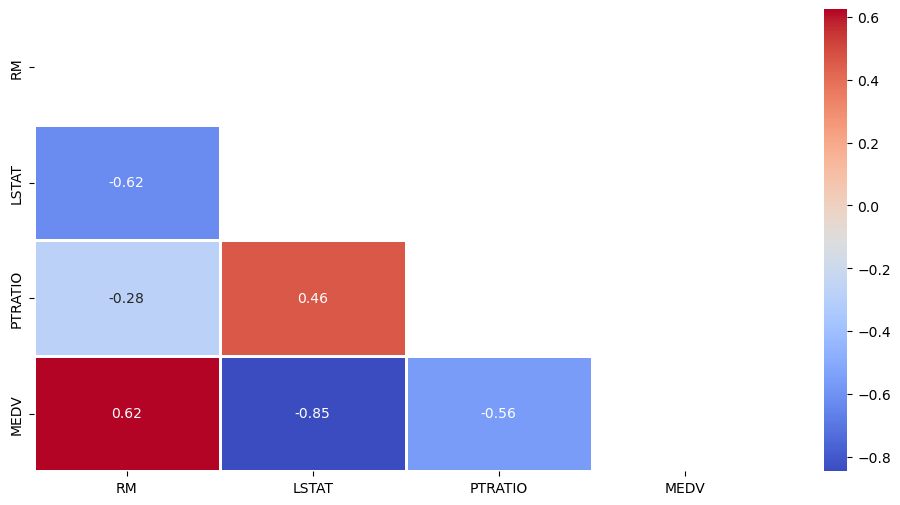

In [82]:
# plot correlação
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))  # mascara para o triangulo superior

plt.figure(figsize=(12,6))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()